In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_data_complete= pd.merge (study_results,mouse_metadata,how="left", on=["Mouse ID","Mouse ID"])
mouse_data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
number_of_mice=len(mouse_metadata['Mouse ID'])
print(number_of_mice)

249


In [3]:
dup_mice_ID = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
duplicate_mice_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
new_duplicate_mice_df = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice_df)==False]
new_duplicate_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
clean_mice = new_duplicate_mice_df["Mouse ID"].nunique()
clean_mice

249

In [7]:
tumor_mean=(new_duplicate_mice_df["Tumor Volume (mm3)"]).groupby(new_duplicate_mice_df['Drug Regimen']).mean()
tumor_median=(new_duplicate_mice_df["Tumor Volume (mm3)"]).groupby(new_duplicate_mice_df['Drug Regimen']).median()
tumor_var=(new_duplicate_mice_df["Tumor Volume (mm3)"]).groupby(new_duplicate_mice_df['Drug Regimen']).var()
tumor_stand_dev=(new_duplicate_mice_df["Tumor Volume (mm3)"]).groupby(new_duplicate_mice_df['Drug Regimen']).std()
tumor_sem=(new_duplicate_mice_df["Tumor Volume (mm3)"]).groupby(new_duplicate_mice_df['Drug Regimen']).sem()

Tumor_summary_df=pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Tumor Median Volume": tumor_median,
    "Tumor Variance":tumor_var,
    "Tumor Standard Deviation": tumor_stand_dev,
    "Tumor Std.Err.":tumor_sem
})
Tumor_summary_df




,Mean Tumor Volume,Tumor Median Volume,Tumor Variance,Tumor Standard Deviation,Tumor Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
Tumor_summary_ag =  new_duplicate_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Tumor_summary_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
mice_count = new_duplicate_mice_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# Observed Mouse Timepoints')

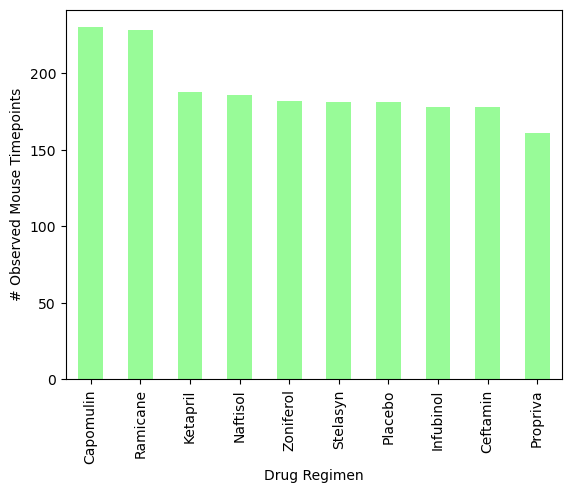

In [25]:
plot_pandas = mice_count.plot.bar(color='palegreen')
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Timepoints")


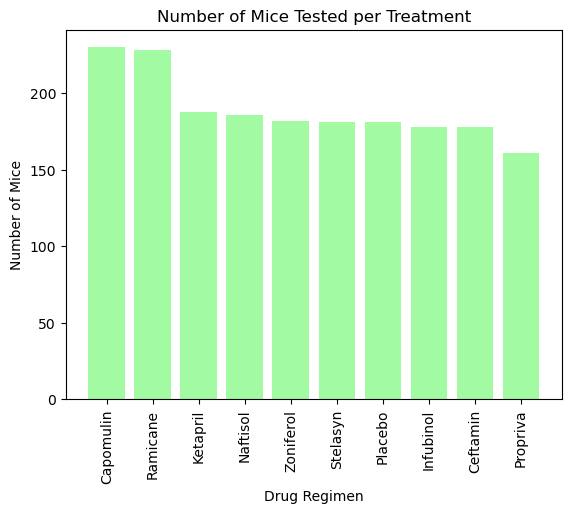

In [26]:
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='palegreen', alpha=0.9, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


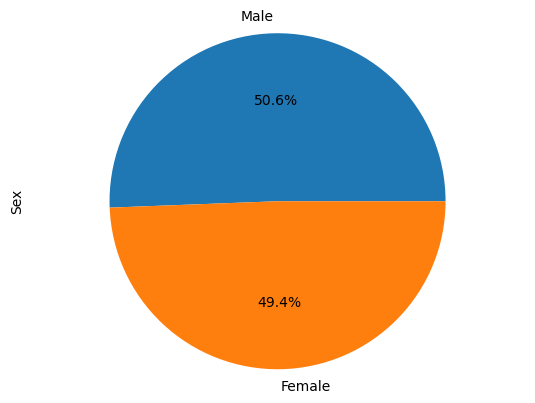

In [12]:
Sex_data = new_duplicate_mice_df["Sex"].value_counts()

Sex_data.plot.pie(autopct= "%1.1f%%")
colors=["lightskyblue","red"]
#plt.pie(size, colors=colors, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

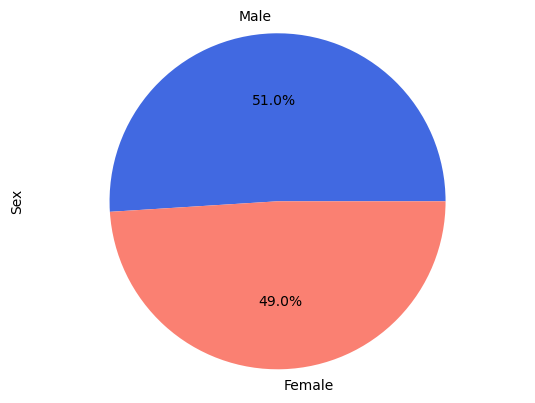

In [23]:
gender_pie=new_duplicate_mice_df["Sex"].value_counts()
labels=["Male","Female"]
sizes=[51,49]
colors=["royalblue","salmon"]
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

In [60]:
Capomulin= new_duplicate_mice_df.loc[new_duplicate_mice_df["Drug Regimen"]=="Capomulin",:]
Ramicane= new_duplicate_mice_df.loc[new_duplicate_mice_df["Drug Regimen"]=="Ramicane",:]
Infubinol= new_duplicate_mice_df.loc[new_duplicate_mice_df["Drug Regimen"]=="Infubinol",:]
Ceftamin= new_duplicate_mice_df.loc[new_duplicate_mice_df["Drug Regimen"]=="Ceftamin",:]

In [89]:
Capomulin_last =(Capomulin.groupby('Mouse ID').max()['Timepoint'])
Ramicane_last=(Ramicane.groupby('Mouse ID').max()['Timepoint'])
Infubinol_last=(Infubinol.groupby('Mouse ID').max()['Timepoint'])
Ceftamin_last=(Ceftamin.groupby('Mouse ID').max()['Timepoint'])


Capomulin_df=pd.merge(Capomulin_last,new_duplicate_mice_df,on=('Mouse ID', 'Timepoint'),how='left')
Ramicane_df=pd.merge(Ramicane_last,new_duplicate_mice_df,on=('Mouse ID', 'Timepoint'),how='left')
Infubinol_df=pd.merge(Infubinol_last,new_duplicate_mice_df,on=('Mouse ID', 'Timepoint'),how='left')
Ceftamin_df=pd.merge(Ceftamin_last,new_duplicate_mice_df,on=('Mouse ID', 'Timepoint'),how='left')


Capomulin_tumor_volume=Capomulin_df.groupby('Tumor Volume (mm3)')['Timepoint']
Ramicane_tumor_volume=Ramicane_df.groupby('Tumor Volume (mm3)')['Timepoint']
Infubinol_tumor_volume=Infubinol_df.groupby('Tumor Volume (mm3)')['Timepoint']
Ceftamin_tumor_volume=Ceftamin_df.groupby('Tumor Volume (mm3)')['Timepoint']


In [91]:
Treatment_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
Tumor_Vol_Data=[]